In [1]:
import pandas as pd 
#load the dataset 
data = pd.read_csv("Wine.csv")

#Seprate features (X) and Labels (y)
x= data.drop("Customer_Segment",axis =1)
y= data['Customer_Segment']

In [2]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(x)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [5]:
from sklearn.decomposition import PCA
#APPly PCA
pca =PCA()
principal_components=pca.fit_transform(X_scaled)


In [6]:
import numpy as np
#find the explained varience ratio 
explained_variance_ratio = pca.explained_variance_ratio_
#Calculate cumulative explained variance
cumulative_variance =np.cumsum(explained_variance_ratio)
#Determine the number of components that capture 95% of the variance
n_components = np.argmax(cumulative_variance >=0.95)+1


In [7]:
selected_components=principal_components[:,:n_components]

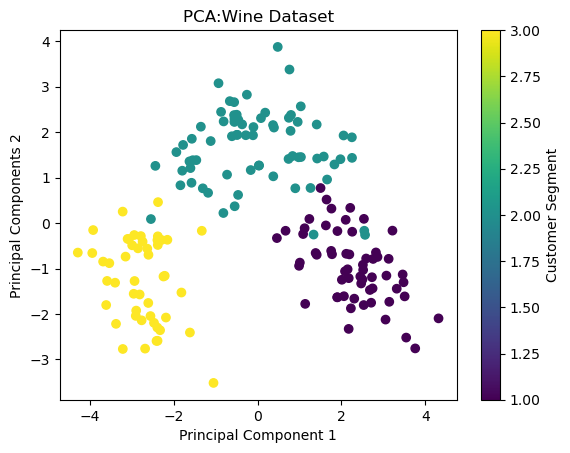

In [9]:
import matplotlib.pyplot as plt
#Assuming the first two principal components capture most variance 
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=y, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel('Principal Components 2')
plt.title('PCA:Wine Dataset')
plt.colorbar(label="Customer Segment")
plt.show()